<a href="https://colab.research.google.com/github/Fadhal1/ejaztech.ai-project/blob/main/HOUSE_SALE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

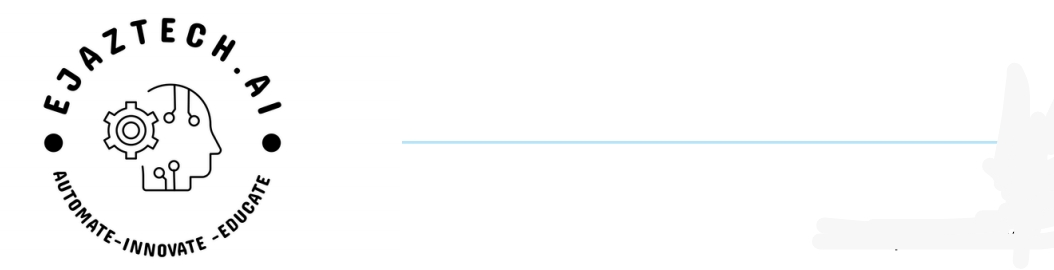

# EJAZTECH.AI FROM ZERO TO HERO PHASE 4 PROJECT SUBMISSION BY SANI FIDDALA MUHAMMAD
PROJECT NO.1

In [1]:
# Installation
!pip install pandas==2.1.4
!pip install scikit-learn==1.6.0

Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
                      ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 95, in resolve
    result = self._result = resolver.resolve(
                            ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 546, in resolve
    state = resolution.resolve(requirements, max_rounds=max_rounds)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [8]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
# Handle missing values
df=df.dropna()
X=df.drop(columns=['price'])
y=df['price']
X=pd.get_dummies(X)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [15]:
X = df.drop(columns=["price"])
y = df["price"]

## Model Training

In [27]:
# Split data into features (X) and target (y)
X_train, X_test, y_train, y_test = train_test_split(X.drop(columns=['date']), y, test_size=0.2, random_state=42)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [21]:
X

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [22]:
y

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0
...,...
21608,360000.0
21609,400000.0
21610,402101.0
21611,400000.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
print(X_train.shape)
print(y_train.shape)

(17290, 19)
(17290,)


In [26]:
X_train

array([[ 0.30839457, -0.39526335, -0.47445144, ...,  0.44228847,
         1.12607326,  0.01344043],
       [ 1.65158104, -1.46896378, -1.45258323, ..., -0.53995821,
        -1.04652268, -0.28066159],
       [-0.75565545, -0.39526335, -1.45258323, ..., -0.86025604,
        -1.19331971, -0.1789339 ],
       ...,
       [ 0.91133008, -0.39526335,  0.50368036, ...,  1.29641601,
        -0.42997519, -0.36604019],
       [-0.99341433, -2.54266422, -1.77862716, ..., -0.77484328,
        -1.19331971,  0.08265159],
       [ 0.54468949,  0.67843709,  0.50368036, ...,  0.81952813,
         1.52242522, -0.24443927]])

In [24]:
y_train

,price
6325,325000.0
13473,257000.0
17614,228500.0
16970,288000.0
20868,479000.0
...,...
11964,378000.0
21575,399950.0
5390,575000.0
860,245000.0


In [25]:
print(X_test.shape)
print(y_test.shape)

(4323, 19)
(4323,)


In [28]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [31]:
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [34]:
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)

RandomForestRegressor()

In [35]:
xgb=XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [38]:
neural_network_model = Sequential([Dense(64,activation='relu',input_shape=(X_train.shape[1],)),
Dense(32,activation='relu'),
Dense(16,activation='relu'),
Dense(1)])
neural_network_model.compile(optimizer='adam', loss='mean_squared_error')
neural_network_model.fit(X_train,y_train,epochs=100,verbose=0)
y_pred = neural_network_model.predict(X_test).flatten()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [49]:
# Define evaluation metrics
metrics = {
    "Mean Absolute Error": mean_absolute_error,
    "Mean Squared Error": mean_squared_error,
    "R-squared": r2_score
}

# Generate predictions for each model
linear_predictions = linear_model.predict(X_test)
tree_predictions = tree_model.predict(X_test)
random_forest_predictions = random_forest_model.predict(X_test)
xgb_predictions = xgb.predict(X_test)
neural_network_predictions = neural_network_model.predict(X_test).flatten()

results = {}
for name, func in metrics.items():
    # Calculate scores for each model
    linear_score = func(y_test, linear_predictions)
    tree_score = func(y_test, tree_predictions)
    random_forest_score = func(y_test, random_forest_predictions)
    xgb_score = func(y_test, xgb_predictions)
    neural_network_score = func(y_test, neural_network_predictions)

    # Store results in the dictionary
    results[name] = {
        "Linear Regression": linear_score,
        "Decision Tree": tree_score,
        "Random Forest": random_forest_score,
        "XGBoost": xgb_score,
        "Neural Network": neural_network_score
    }

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [52]:
display(results)

{'Mean Absolute Error': {'Linear Regression': 127474.10296303837,
  'Decision Tree': 103699.35368956743,
  'Random Forest': 73079.72830561339,
  'XGBoost': 71849.74212153742,
  'Neural Network': 106551.76506838422},
 'Mean Squared Error': {'Linear Regression': 45164817780.89726,
  'Decision Tree': 37602760130.6219,
  'Random Forest': 21797474366.776867,
  'XGBoost': 20450298034.572346,
  'Neural Network': 32004024628.980824},
 'R-squared': {'Linear Regression': 0.7012448735876724,
  'Decision Tree': 0.7512661866416768,
  'Random Forest': 0.8558146023857041,
  'XGBoost': 0.8647258712715865,
  'Neural Network': 0.7883005646094192}}

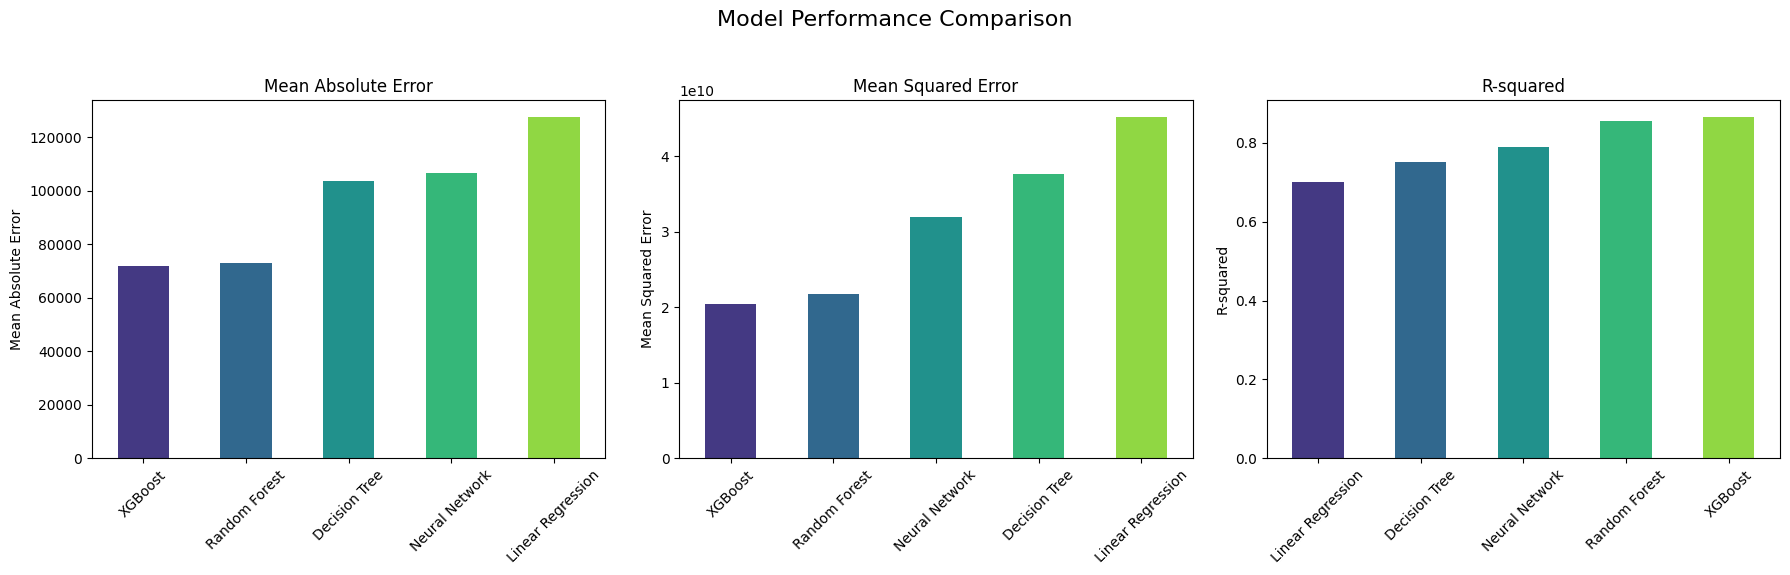

In [54]:


# Converting the results to a pandas DataFrame
results_df = pd.DataFrame(results)

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=len(results_df.columns), figsize=(18, 6))
fig.suptitle('Model Performance Comparison', fontsize=16)

for i, metric in enumerate(results_df.columns):
    ax = axes[i]
    results_df[metric].sort_values().plot(kind='bar', ax=ax, color=sns.color_palette('viridis', len(results_df)))
    ax.set_title(metric)
    ax.set_ylabel(metric)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

**interpretation of the model performances**

* Mean Absolute Error (MAE): This metric measures the
average magnitude of errors in a set of predictions, without considering their direction. A lower MAE indicates a better model.
* Mean Squared Error (MSE): This metric measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. It's more sensitive to large errors than MAE. A lower MSE indicates a better model.
* R-squared: This metric represents the proportion of the variance in the dependent variable that is predictable from the independent variables. A higher R-squared indicates that the model fits the data better.

**results performance:**

* The XGBoost model has the lowest MAE and MSE, and the highest R-squared value. This suggests that the XGBoost model is the best performing model among those you trained for this particular dataset and task.
* The Random Forest model also performed very well, with metrics close to those of XGBoost.
* The Linear Regression model had the highest MAE and MSE, and the lowest R-squared, indicating it was the least effective model in this case.
* The Neural Network performed better than Linear Regression but not as well as Random Forest or XGBoost.

In conclusion, the XGBoost model appears to be the most suitable model for predicting house prices.


